<b>Problem:</b>
<p>Apply segmentation for the following fingerprint images as best as you can. Fingerprints must be black color whereas the background must be white:</p>
<table  border="0">
    <tr>
        <td><img align="center" width="65%" src="images/huella_1.jpg"></td>
        <td><img align="center" width="65%" src="images/huella_2.jpg"></td>
        <td><img align="center" width="65%" src="images/huella_3.jpg"></td>
        <td><img align="center" width="65%" src="images/huella_4.jpg"></td>
    </tr>
</table>

<b>Add Required Packages:</b>

In [ ]:
Pkg.add("Images")
Pkg.add("ImageMagick")
Pkg.add("ImageView")
Pkg.add("PyPlot")
kg.add("Gadfly")

Pkg.update()

<b>Adquire Image Function:</b>

In [2]:
function getImgMatrix(file)
    #Adquire Image, convert to Gray and then return a Array{Int32} object
    binImage=convert(Image{Gray},load(file))
    grayImage=raw(binImage)

    imgMatrix = convert(Array{Int32},grayImage)
    return imgMatrix
end

getImgMatrix (generic function with 1 method)

<b>Get Histogram Function:</b>

In [8]:
function getHistrogram(imgMatrix)
    #Get matrix size
    cols,rows=size(imgMatrix)
    
    #Calculate histogram
    histogram=zeros(256)

    for i=1:rows
        for j=1:cols
            histogram[imgMatrix[j,i]+1]=histogram[imgMatrix[j,i]+1]+1
        end
    end
    
    return histogram
end

getHistrogram (generic function with 1 method)

<b>Otsu Filter Function:</b>

In [3]:
function otsuFilter(imgMatrix)
    rows,cols=size(imgMatrix)

    histograma=getHistrogram(imgMatrix)
    
    total = rows * cols

    suma=sum(collect(1:256) .* histograma)

    sumB=0
    wB=0
    wF=0

    varMax=0
    threshold=0

    for t=1:256
        var=histograma[t]

        wB = wB + histograma[t]
        if wB == 0
            continue
        end

        wF = total - wB
        if wF == 0
            break
        end

        sumB = sumB + ((t) * histograma[t])
        mB = sumB / wB
        mF = (suma - sumB) / wF

        varBetween = round(Int,wB * wF * ((mB - mF) * (mB - mF)))

        if varBetween > varMax
            varMax = varBetween
            threshold = t
        end

    end

    out=zeros(rows,cols)
    pos=find(x-> x >= threshold, imgMatrix)
    out[pos]=255
    
    return out
end

otsuFilter (generic function with 1 method)

<b>Display Function:</b>

In [4]:
function displayGrayMatrix(imgMatrix)
    imgMatrix2 = convert(Array{Int32},abs(imgMatrix))
    imgOut = convert(Array{UInt8,2},imgMatrix2)
    imgOut = grayim(imgOut)
    display(imgOut)
end

displayGrayMatrix (generic function with 1 method)

<b>Execution:</b>

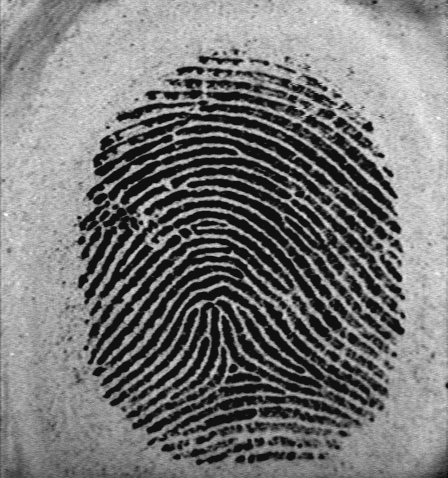

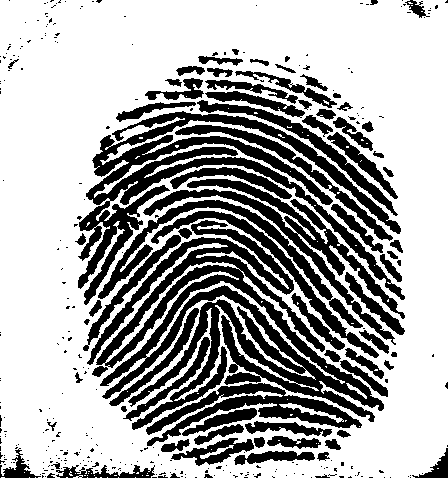

In [9]:
using Images, Colors, FixedPointNumbers, ImageView

imgMatrix1 = getImgMatrix("images/huella_1.jpg") 
#You can run additional tests with huella_2.jpg, huella_3.jpg and huella_4.jpg files

out1=otsuFilter(imgMatrix1)
displayGrayMatrix(imgMatrix1)
displayGrayMatrix(out1)